<a href="https://colab.research.google.com/github/Estebanlv06/proyecto-de-titulo/blob/main/proyecto_de_titulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análisis exploratorio de datos

In [36]:
# Importar las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [37]:
# Cargar datos en formato csv
df = pd.read_csv('/content/DataSet-16-11-2022-final.csv', index_col=0, parse_dates=True)

In [38]:
# Visualizar primeras 20 filas
df

,field1,field2,field3,field4,OD
created_at,,,,,
2022-09-15 20:30:00,10,88,11,6.890,10.92
2022-09-16 12:31:00,9,88,7,6.890,8.50
2022-09-16 19:31:00,9,88,7,7.890,8.50
2022-09-17 10:26:00,17,92,5,6.790,8.20
2022-09-17 11:26:00,17,92,7,6.790,14.50
...,...,...,...,...,...
2022-11-15 11:32:00,22,95,16,836.000,9.31
2022-11-15 21:32:00,15,91,18,0.716,2.97
2022-11-15 22:32:00,14,91,18,0.726,13.61


In [39]:
# Recorrer la columna del ph para ordenar los datos
n=0
while n!=len(df.index):
    n1= 0;
    newVar = "" 
    caracter = df.field4.values[n]
    if(caracter<1):
        caracter = str(caracter)
        for n1 in range(len(caracter)):
            newVar += caracter[(len(caracter)-1)-n1]
            if(n1==0):
                newVar += "."
        newVar = newVar[:-2]
        df.field4.values[n]=float(newVar)
        df.to_csv("/content/DataSet_completo.csv", index=False) 
    n+=1

In [40]:
df.describe()

,field1,field2,field3,field4,OD
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,15.990431,80.377990,15.722488,177.216268,6.722536
std,8.486976,21.290249,4.239186,833.263642,3.812761
min,2.000000,13.000000,5.000000,1.170000,0.000000
25%,10.000000,87.000000,13.000000,6.380000,3.370000
50%,14.000000,89.000000,16.000000,6.720000,6.280000
75%,18.000000,91.000000,18.000000,7.690000,9.480000
max,53.000000,95.000000,28.000000,9016.000000,15.000000


In [41]:
# Exploración de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2022-09-15 20:30:00 to 2022-11-16 10:32:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   field1  209 non-null    int64  
 1   field2  209 non-null    int64  
 2   field3  209 non-null    int64  
 3   field4  209 non-null    float64
 4   OD      209 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.8 KB


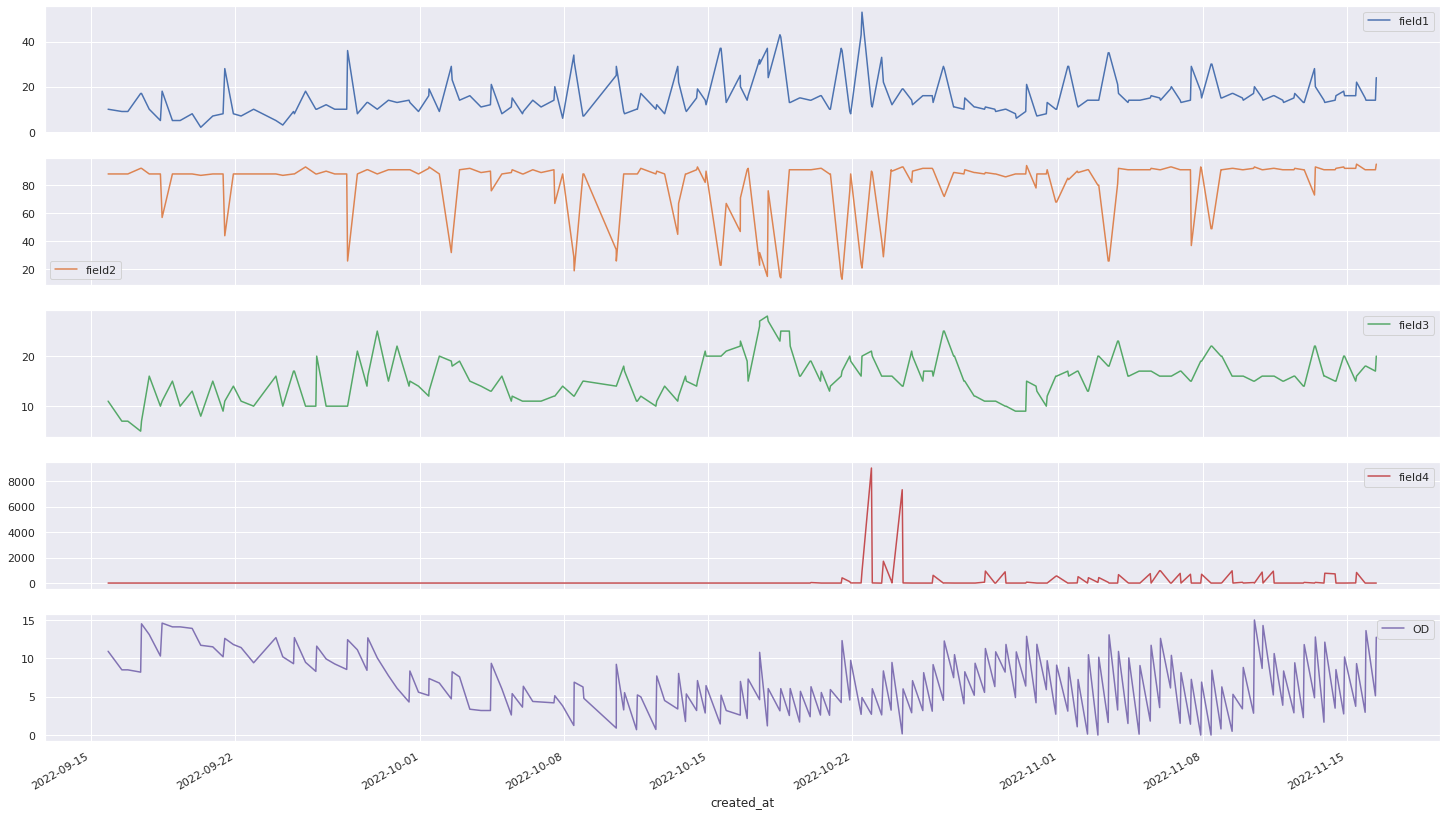

In [42]:
gr1 = df.plot(figsize=(25, 15), subplots=True)

In [43]:
# Remplaza los valores de la temperatura en la solución que estan bajo los -5 grados por el promedio de todos los datos (14 grados)
n=0
while n!=len(df.index):
    if df.field3.values[n]<-5:
     df.field3.values[n]=14
    n+=1
df.to_csv("/content/DataSet_completo.csv", index=False) 

In [44]:
# Remplaza los valores del ph que sean mayores a 14 por un ph neutro (7)
n=0
while n!=len(df.field4.index):
    if df.field4.values[n]>14:
      df.field4.values[n]=7
    n+=1
df.to_csv("/content/DataSet_completo.csv", index=False) 

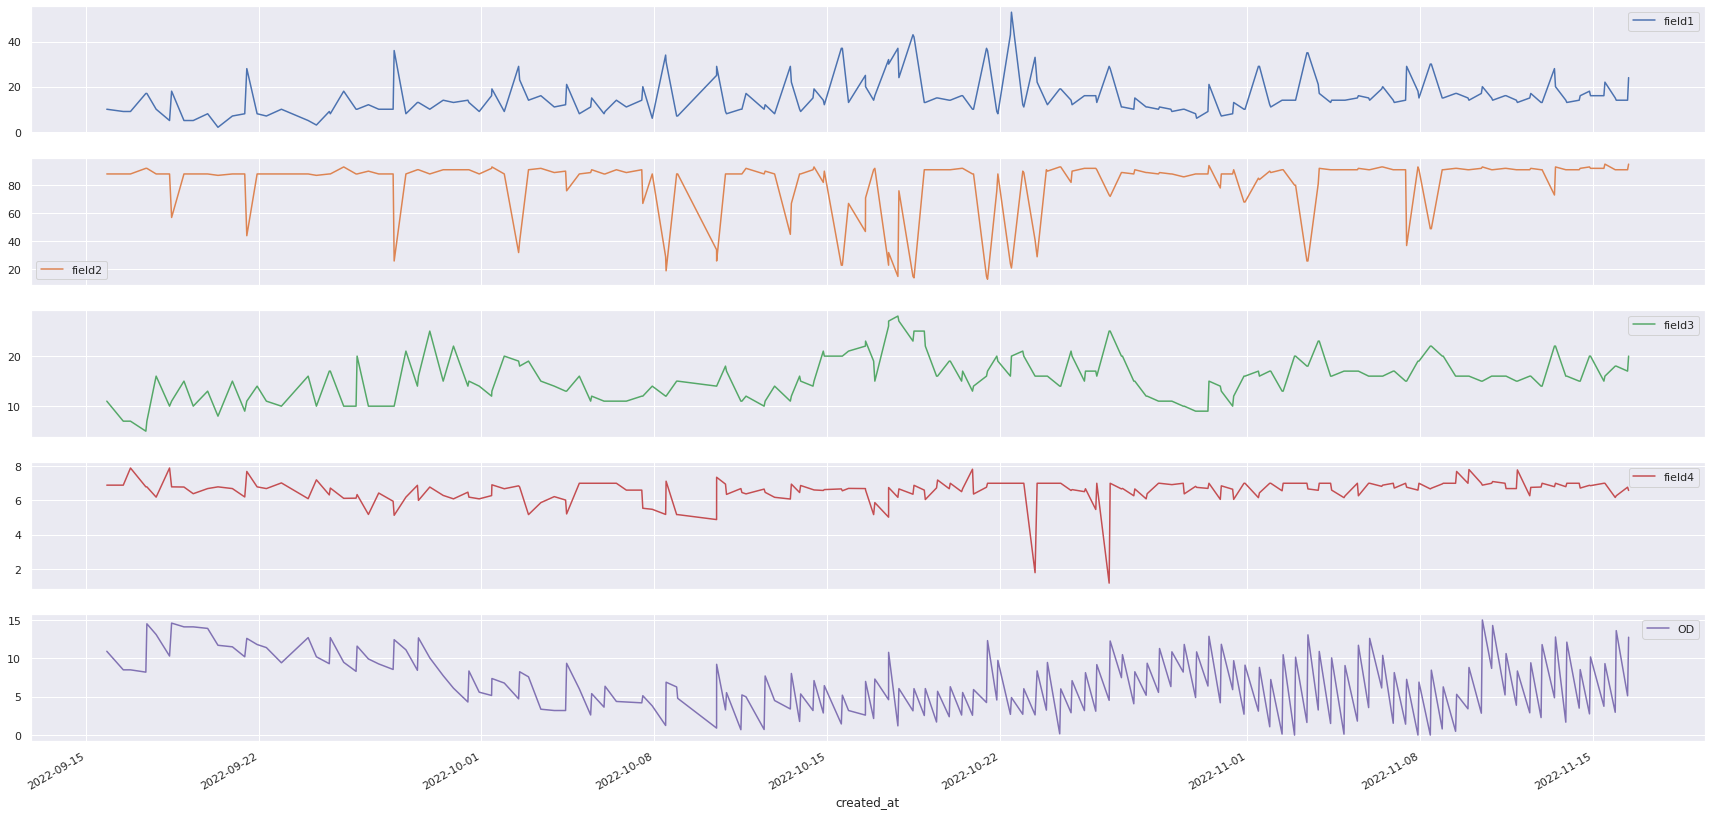

In [45]:
# Grafica normalizada
gr2 = df.plot(figsize=(30, 15), subplots=True)

In [46]:
df.columns = ['temp', 'hum', 'tempS', 'ph', 'OD']
df.index.name = 'date'
df.to_csv('/content/DataSet_completo.csv')
df

,temp,hum,tempS,ph,OD
date,,,,,
2022-09-15 20:30:00,10,88,11,6.89,10.92
2022-09-16 12:31:00,9,88,7,6.89,8.50
2022-09-16 19:31:00,9,88,7,7.89,8.50
2022-09-17 10:26:00,17,92,5,6.79,8.20
2022-09-17 11:26:00,17,92,7,6.79,14.50
...,...,...,...,...,...
2022-11-15 11:32:00,22,95,16,7.00,9.31
2022-11-15 21:32:00,15,91,18,6.17,2.97
2022-11-15 22:32:00,14,91,18,6.27,13.61


In [47]:
# Asigno los datos a un dataframe:
data = pd.read_csv('/content/DataSet_completo.csv', index_col=0, parse_dates=True)
data.head(10)

,temp,hum,tempS,ph,OD
date,,,,,
2022-09-15 20:30:00,10,88,11,6.89,10.92
2022-09-16 12:31:00,9,88,7,6.89,8.50
2022-09-16 19:31:00,9,88,7,7.89,8.50
2022-09-17 10:26:00,17,92,5,6.79,8.20
2022-09-17 11:26:00,17,92,7,6.79,14.50
2022-09-17 20:26:00,10,88,16,6.19,13.10
2022-09-18 09:27:00,5,88,10,7.89,10.30
2022-09-18 11:27:00,18,57,11,6.79,14.59
2022-09-18 23:27:00,5,88,15,6.78,14.10


In [48]:
# Vista de las columnas:
data.columns

Index(['temp', 'hum', 'tempS', 'ph', 'OD'], dtype='object')

In [49]:
data.describe()

,temp,hum,tempS,ph,OD
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,15.990431,80.377990,15.722488,6.588038,6.722536
std,8.486976,21.290249,4.239186,0.723638,3.812761
min,2.000000,13.000000,5.000000,1.170000,0.000000
25%,10.000000,87.000000,13.000000,6.380000,3.370000
50%,14.000000,89.000000,16.000000,6.720000,6.280000
75%,18.000000,91.000000,18.000000,7.000000,9.480000
max,53.000000,95.000000,28.000000,7.890000,15.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2022-09-15 20:30:00 to 2022-11-16 10:32:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    209 non-null    int64  
 1   hum     209 non-null    int64  
 2   tempS   209 non-null    int64  
 3   ph      209 non-null    float64
 4   OD      209 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.8 KB


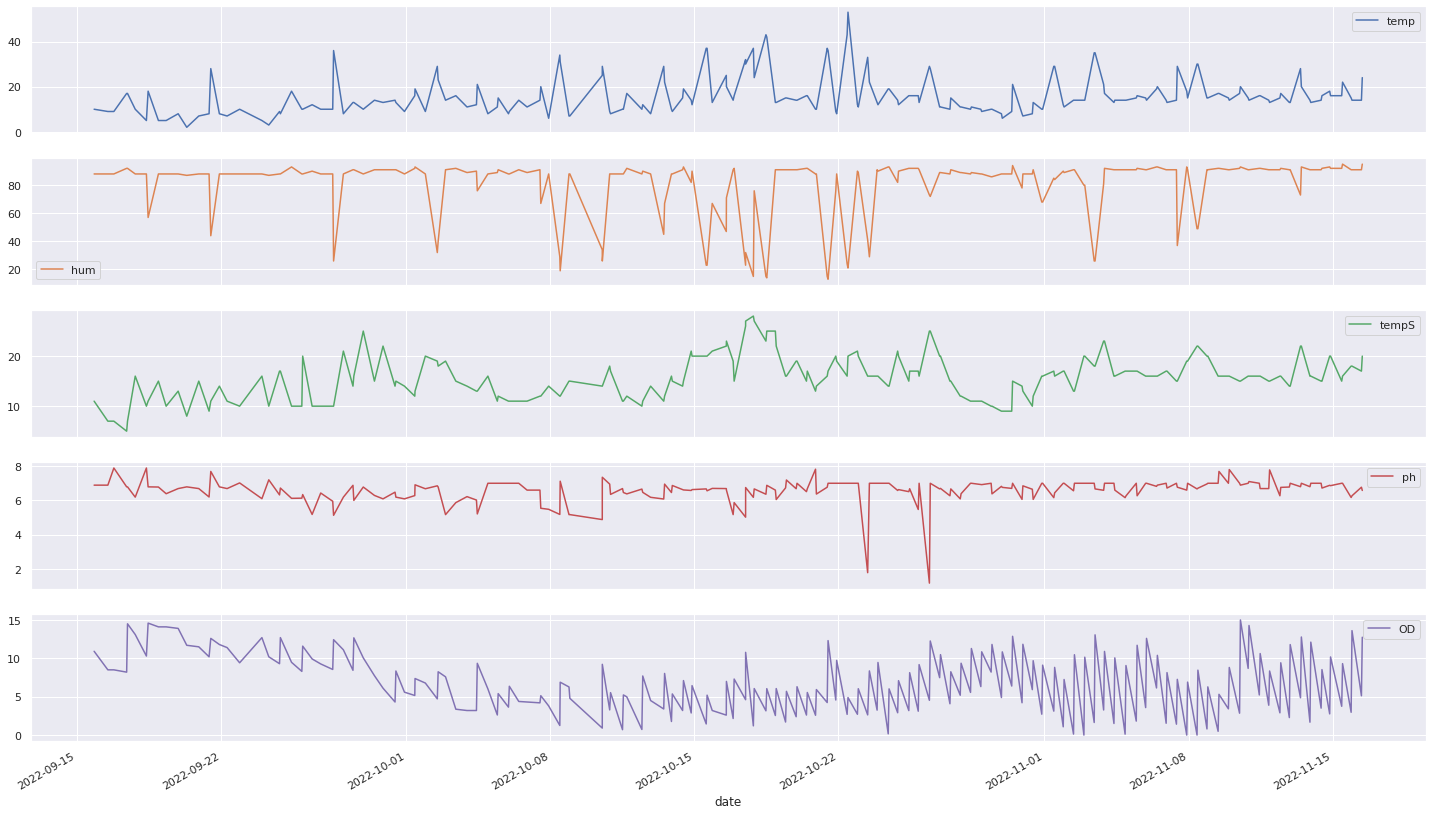

In [51]:
# Finalmente las graficas quedan de la siguiente manera
gr1 = data.plot(figsize=(25, 15), subplots=True)

In [52]:
# Resumen de estadística descriptiva:
data['OD'].describe()

count    209.000000
mean       6.722536
std        3.812761
min        0.000000
25%        3.370000
50%        6.280000
75%        9.480000
max       15.000000
Name: OD, dtype: float64

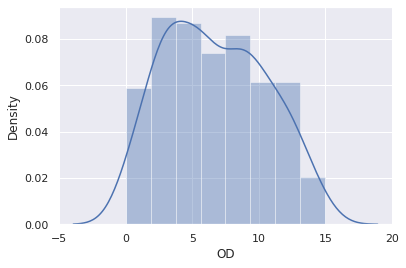

In [53]:
# Histograma:
sns.distplot(data['OD']);

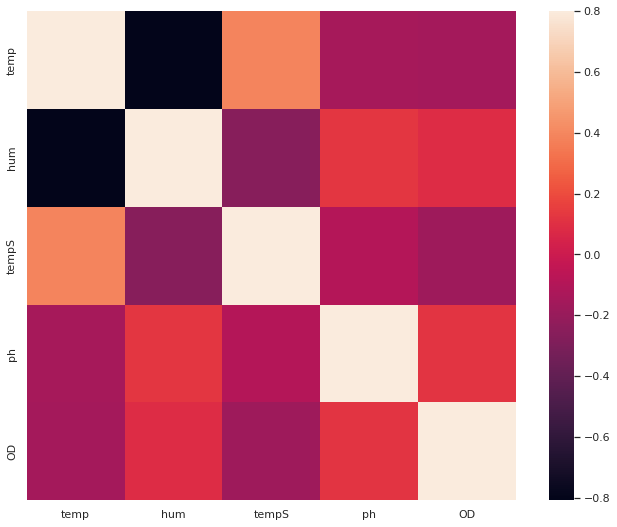

In [57]:
# Matriz de correlación:

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

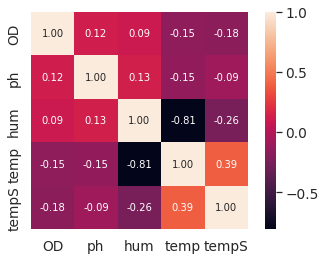

In [58]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'OD')['OD'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [59]:
corr = data.corr()
corr[['OD']].sort_values(by = 'OD',ascending = False).style.background_gradient()

,OD
OD,1.000000
ph,0.120919
hum,0.089127
temp,-0.153281
tempS,-0.175485


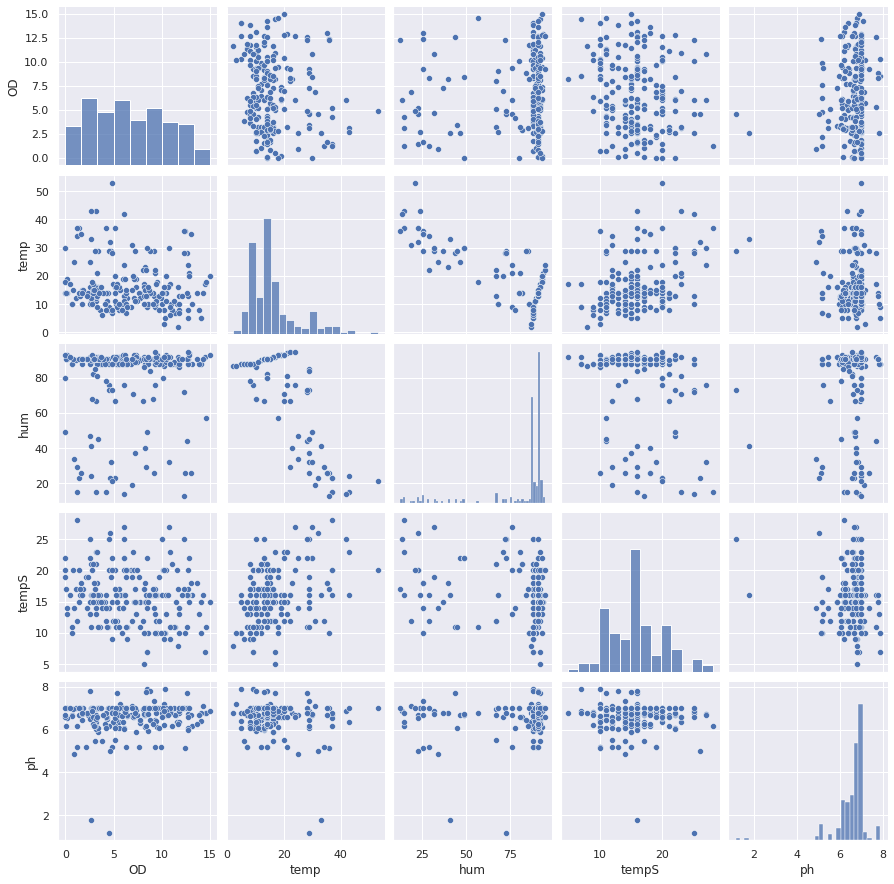

In [60]:
sns.set()
cols = ['OD', 'temp', 'hum', 'tempS', 'ph']
sns.pairplot(data[cols], size = 2.5)
plt.show()


---

#                                     Modelo LSTM


In [61]:
import math
from sklearn.preprocessing import RobustScaler

training_data_len = math.ceil(len(data) *0.9) # tomando 90% de los datos para entrenamiento y 10% de los datos para test
testing_data_len = len(data) - training_data_len

time_steps = 2
train, test = data.iloc[0:training_data_len], data.iloc[(training_data_len-time_steps):len(data)]
print(data.shape, train.shape, test.shape)

(209, 5) (189, 5) (22, 5)


In [62]:
# Escalar todos los datos de las columnas ['field1', 'field2', 'field3', 'field4']
train_trans = train[['temp', 'hum', 'tempS', 'ph']].to_numpy()
test_trans = test[['temp', 'hum', 'tempS', 'ph']].to_numpy()

In [63]:
scaler = RobustScaler() # Manejo de valores atípicos
train.loc[:, ['temp', 'hum', 'tempS', 'ph']]=scaler.fit_transform(train_trans)
test.loc[:, ['temp', 'hum', 'tempS', 'ph']]=scaler.fit_transform(test_trans)

In [64]:
# Escalar todos los datos de las columnas ['OD']
train['OD'] = scaler.fit_transform(train[['OD']])
test['OD'] = scaler.fit_transform(test[['OD']])

In [65]:
from tqdm import tqdm_notebook as tqdm

# Dividor los datos del conjunto de datos en x_train y y_train
x_train = []
y_train = []

for i in tqdm(range(len(train) - time_steps)):
    x_train.append(train.drop(columns='OD').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'OD'].iloc[i + time_steps])

# Convertir x_train y y_train en una matrices numpy
x_train = np.array(x_train)
y_train = np.array(y_train)

  0%|          | 0/187 [00:00<?, ?it/s]

In [66]:
# Crear los conjuntos de datos x_test y y_test
x_test = []
y_test = data.loc[:,'OD'].iloc[training_data_len:len(data)]

In [67]:
for i in tqdm(range(len(test) - time_steps)):
    x_test.append(test.drop(columns='OD').iloc[i:i + time_steps].to_numpy())
    #y_test.append(test.loc[:,'OD'].iloc[i + time_steps])

  0%|          | 0/20 [00:00<?, ?it/s]

In [68]:
# Convertir x_test y y_test en matrices numpy
x_test = np.array(x_test)
y_test = np.array(y_test)

In [69]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 

model = Sequential()
model.add(Bidirectional(LSTM(50,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer="adam",loss="mse")

history = model.fit(x_train, y_train, epochs=150, batch_size=24, validation_split=0.1, shuffle=True)


Epoch 1/150
7/7 [==============================] - 8s 305ms/step - loss: 0.3452 - val_loss: 0.4906
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 0.3380 - val_loss: 0.4902
Epoch 3/150
7/7 [==============================] - 0s 11ms/step - loss: 0.3124 - val_loss: 0.4926
Epoch 4/150
7/7 [==============================] - 0s 12ms/step - loss: 0.3211 - val_loss: 0.4896
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.3061 - val_loss: 0.4979
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 0.2952 - val_loss: 0.5089
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.2953 - val_loss: 0.5212
Epoch 8/150
7/7 [==============================] - 0s 11ms/step - loss: 0.3097 - val_loss: 0.5190
Epoch 9/150
7/7 [==============================] - 0s 12ms/step - loss: 0.2862 - val_loss: 0.5167
Epoch 10/150
7/7 [==============================] - 0s 10ms/step - loss: 0.2925 - val_loss: 0.5181
Epoch 11/150
7/7 [

In [70]:
import joblib
joblib.dump(model, 'modelo_entrenado.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dropout
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-28 20:19:23

['modelo_entrenado.pkl']

In [71]:
import math
from sklearn.preprocessing import RobustScaler

training_data_len = math.ceil(len(data) *0.005) # tomando 90% de los datos para entrenamiento y 10% de los datos para test
testing_data_len = len(data) - training_data_len

time_steps = 2
train, test = data.iloc[0:training_data_len], data.iloc[(training_data_len-time_steps):len(data)]
print(data.shape, train.shape, test.shape)

(209, 5) (2, 5) (209, 5)


In [72]:
# Escalar todos los datos de las columnas ['field1', 'field2', 'field3', 'field4']
train_trans = train[['temp', 'hum', 'tempS', 'ph']].to_numpy()
test_trans = test[['temp', 'hum', 'tempS', 'ph']].to_numpy()

In [73]:
scaler = RobustScaler() # Manejo de valores atípicos
test.loc[:, ['temp', 'hum', 'tempS', 'ph']]=scaler.fit_transform(test_trans)

In [74]:
# Escalar todos los datos de las columnas ['OD']
test['OD'] = scaler.fit_transform(test[['OD']])

In [75]:
# Crear los conjuntos de datos x_test y y_test
x_test = []
y_test = data.loc[:,'OD'].iloc[training_data_len:len(data)]

In [76]:
for i in tqdm(range(len(test) - time_steps)):
    x_test.append(test.drop(columns='OD').iloc[i:i + time_steps].to_numpy())

  0%|          | 0/207 [00:00<?, ?it/s]

In [77]:
# Convertir x_test y y_test en matrices numpy
x_test = np.array(x_test)
y_test = np.array(y_test)

In [78]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)# Deshacer el escalado
#y_pred

7/7 [==============================] - 1s 3ms/step


In [79]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lstm
print("RMSE: %f" % (rmse_lstm))

RMSE: 3.548032


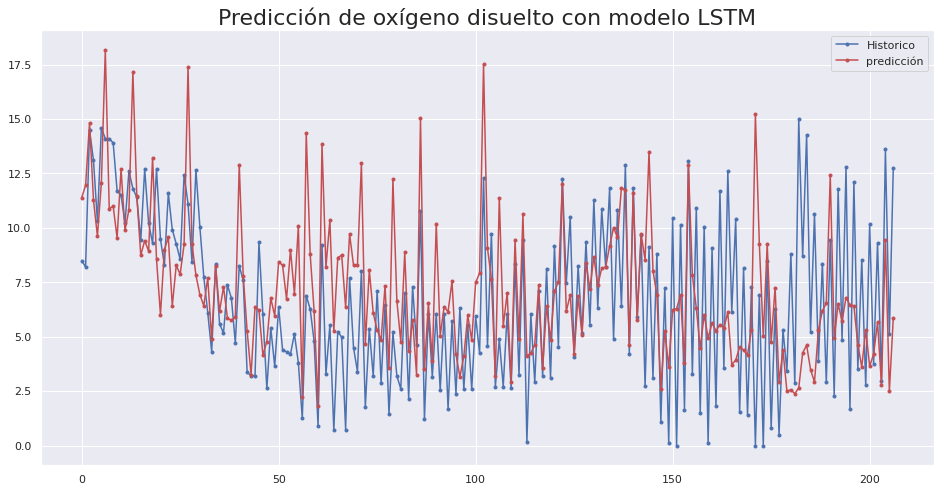

In [80]:
# Grafica de las predicciones realizada por el modelo LSTM
plt.figure(figsize=(16, 8))
plt.title('Predicción de oxígeno disuelto con modelo LSTM', fontsize=22)
plt.plot(y_test, marker = ".", label='Historico')
plt.plot(y_pred, marker = ".", label='predicción',color="r")
plt.legend()